## Exercises and supplementary notes - Week 4, Session AM1

We'll be using the same tools that we used last week for this session.

- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization
- [scikit-learn](scikit-learn.org) an extensive machine learning library.
- [numpy](numpy.org) - a fundamental maths library best used by people with a strong maths background.  We won't explore it much today, but it does have some useful methods that we'll need.  It underlies all other mathematical and plotting tools that we use in Python.

Shortly we'll also by trying out:
- [statsmodel](statsmodel.org) - this is another library for doing statistical fitting.  It generates R-like reports.
- We'll also being trying out two new parts of scikit-learn sklearn.cross_decomposition and decomposition for PLS and PCA 

We'll be using scikit-learn over the next few weeks, and it's well worth reading the documentation and high level descriptions.

As before, the aim is to get familiar with code-sharing workflows - so we will be doing pair programming for the duration of the day! _You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.

Topics that we'll be discussing in this session include:
Robust Regression - http://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors


## Git links

We will be working through using GitHub and GitKraken to share code between pairs. We will go through all the workflow in detail in class but here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

## Exercise:  Apply statsmodel to the synthetic drilling hole data.

Statsmodel has an API with similarities to scikit-learn, but uses statistical language (particularly as used in financial and economic models) rather than the terminology that is more common in machine learning.  Statsmodel refers to endogeneous and exogeneous variables.  In many ways they reflect the differences in philosophy between how people with a statistics modelling background work, vs people with machine learning/computing backgrounds.  Scikit-learn has a focus on training and validation error curves and cross-validation to choose a model, whereas statsmodel provides metrics for hypothesis tests and goodness-of-fit.

We'll briefly look at a typical report that statsmodel generates after fitting.

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from week4_help import create_composition_dataframe, create_observations, create_templates_matrix

templates = create_templates_matrix()
compositions = create_composition_dataframe(150)
observations = create_observations(compositions, templates)

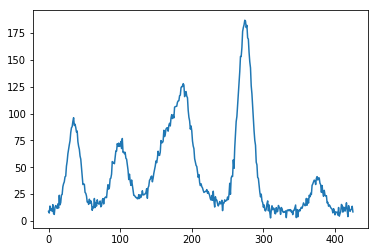

In [2]:
plt.plot(observations[:, 3])

In [3]:
X = templates
y = observations[:, 3]
model = sm.OLS(y, X).fit()

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.892e+04
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:44:27   Log-Likelihood:                -1065.5
No. Observations:                 426   AIC:                             2141.
Df Residuals:                     421   BIC:                             2161.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            32.2465      0.137    235.753      0.000      31.978      32.515
x2             5.0995      0.143     35.644      0.000       4.818       5.381
x3            20.8702      0.195    107.091      0.000      20.487      21.253
x4             5.5591      0.398     13.962      0.000       4.777       6.342
const          9.8239      0.219     44.834      0.000       9.393      10.255
==============================================================================
Omnibus:                        3.593   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                3.791
Skew:                          -0.110   Prob(JB):                        0.150
Kurtosis:                       3.407   Cond. No.                         4.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's compare this against ground truth:

In [29]:
compositions.head(1)

,Quartz,Dilithium,Kryptonite,Unobtainium
0,5.0,33.734294,20.051871,5.399245


## Principal Components Analysis

We have just worked through the theory behind principal components analysis.  Let's see how we can use it in scikit-learn.  We have also seen how our drilling data problem has many correlated variables, which we have good reason to expect have a lower-dimensional structure.

### Exercise Look at the correlation matrix

Lets look at the correlation matrix for the original instrument-observed features.  As you've seen, the feature variables are highly correlated with each other.  In real-world situations, if we wanted to use linear least squares to find the underlying templates, this can cause linear least squares to fail.  Particularly as we will often have fewer observations than there are unknown variables (426).  

Seaborn's heatmap is useful for showing these correlations visually, but it can be very slow.  Matplotlib's matshow is faster, try Matplotlib if heatmap doesn't work well on your machine.

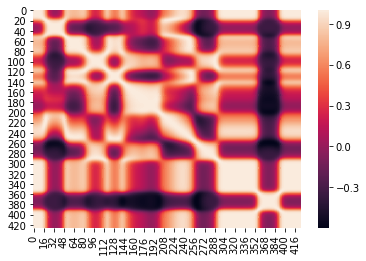

In [6]:
import seaborn as sns
correlation_matrix = np.corrcoef(X)
sns.heatmap(correlation_matrix)

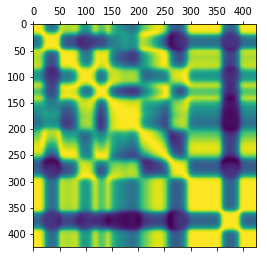

In [7]:
plt.matshow(correlation_matrix)

## Exercise:  Apply PCA to observations matrix.

In [30]:
#Let's find the first 15 principal components.  They're presented
# in order of expained variance.

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(observations)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
print(pca.components_)
print (len(pca.components_[0]))

[[ 0.0431516   0.04469984  0.04544119 ...  0.08883485  0.08543511
   0.09303524]
 [ 0.14035406  0.14809276  0.14117042 ...  0.06521426  0.05447067
  -0.06024896]
 [ 0.02580488  0.08488279  0.07790241 ... -0.064679   -0.1345526
   0.04907384]
 ...
 [-0.04506893  0.03836751 -0.00380924 ... -0.0592735  -0.06060928
   0.09963905]
 [-0.05220066  0.08050671  0.01655173 ... -0.12468357  0.01215113
   0.05114476]
 [ 0.00454005  0.054514   -0.02375517 ... -0.00314796  0.07003219
   0.00717956]]
150


Oops!  Can you see what's wrong here?  The components should have the same length as the orginal observations.  These components have only 150 elements.  This means that the observations array isn't organised properly for PCA fitting.  It thinks that we have ~400 observations, each with 150 features.  To fix this we should transpose the matrix.

It's always good to look at the dimensions of our arrays to ensure we're not making trivial but annoying mistakes like this.

In [35]:
transposed_observations = observations.transpose()

In [36]:
pca.fit(transposed_observations)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
print(pca.components_)
print (len(pca.components_[0]))

[[-4.12515425e-04  3.53405044e-05 -9.22118415e-04 ... -7.55193559e-06
  -1.88542095e-04  2.63927874e-04]
 [ 1.38545130e-03  1.13953460e-03  2.26005818e-03 ... -5.27335166e-04
  -1.54822886e-03 -2.61499763e-04]
 [ 1.58246742e-02 -3.21943824e-03 -8.87326056e-03 ... -7.28288443e-03
   6.26131627e-03  3.26170982e-04]
 ...
 [ 2.10812622e-02 -7.12491605e-03  2.75155767e-02 ... -4.20970754e-02
   5.19388569e-02 -1.55929999e-04]
 [-3.12034231e-02  4.39184643e-02  4.24749185e-03 ...  3.27148429e-02
  -1.71050262e-02  1.59262372e-02]
 [ 8.38424840e-02  3.11665190e-03  2.04949980e-02 ... -9.24913630e-02
  -2.52133878e-02  2.84218048e-02]]
426


That's better!  We clearly have many more elements in these component arrays now.

Let's look at the explained variance, as discussed in the Powerpoints.  Intuitively, this sounds like what you want.  Some documentation on the web also suggests that this is what we want. But Python is a living project and this now returns abstract quantities ("eigenvalues") that are related to the variances, but are not variances.

In [39]:
print(pca.explained_variance_)

[1.50178872e+05 1.95963035e+04 6.48338231e+02 2.76616089e+02
 6.30375500e+01 6.12624983e+01 5.76615864e+01 5.71635600e+01
 5.52995244e+01 5.52602331e+01 5.42742670e+01 5.35646654e+01
 5.29230068e+01 5.17580874e+01 5.05833241e+01]


Nowadays we should use explained_variance_ratio, like this:

In [40]:
print (pca.explained_variance_ratio_)

[8.61271657e-01 1.12384256e-01 3.71820173e-03 1.58638558e-03
 3.61518597e-04 3.51338724e-04 3.30687595e-04 3.27831427e-04
 3.17141235e-04 3.16915901e-04 3.11261412e-04 3.07191867e-04
 3.03511972e-04 2.96831193e-04 2.90093958e-04]


This says that the first component was able to account for about 86% of the variation, and the two following components account for about 1% and then less than 1% each.

PCA has compressed 87% of the variation in ~400 features into just two transformed features!

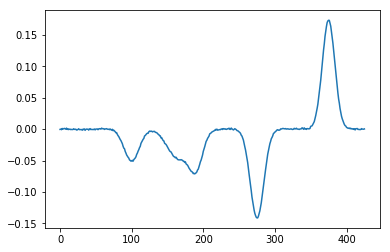

In [41]:
# What do these principal components look like?
plt.plot(pca.components_[0])

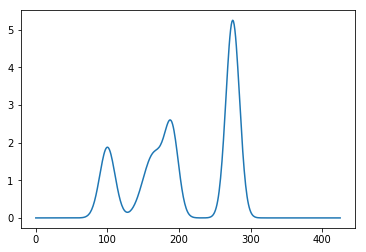

In [42]:
# How does this compare to our quartz template?  Remember,
# with PCA we've only seen the observations.  The PCA transform
# didn't know what the templates were beforehand.
plt.plot(templates[:,0])

As you can see, the principal components may not find the original templates, but what it does find are patterns that can help distinguish the templates from each other.  Notice how the first three peaks do seem to relate to the first three in the template, though inverted (mathematically, this doesn't matter).  Interestingly there is a fourth peak present.  This is likely because that fourth peak is important for distinguishing quartz from another phase that otherwise looks similar.  Note it has opposite sign to the first three peaks.  It can be very hard (and it's often academic) to interpret qualitatively what the meaning in the components is.  But in this case it does have a clear relevance. 

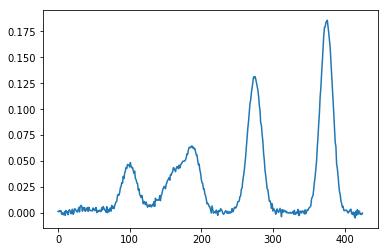

In [17]:
# Dilithium?
plt.plot(pca.components_[1])

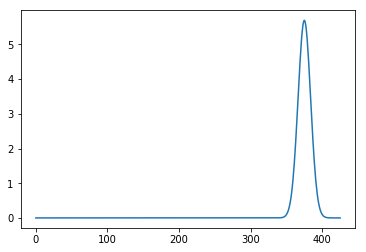

In [18]:
# The dilithium template
plt.plot(templates[:,1])

This is interesting.  In the mixtures dilithium and quartz often appear together.  The principal component has a fourth peak that is sensitive to the fourth peak.  The quartz peak was inverted as it was trying to filter it out.

Note: During the initial presentation I hadn't looked at it closely enough and thought that the peak was offset a bit.  This happens sometimes with principal components when there are interferences, and the principal component becomes sensitive to a leading or falling edge.  But it doesn't seem to be happening in this particular instance.

Let's plot them over each other to be sure -

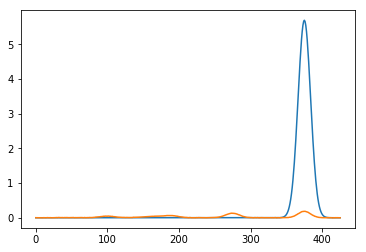

In [43]:
plt.plot(templates[:, 1])
plt.plot(pca.components_[1])

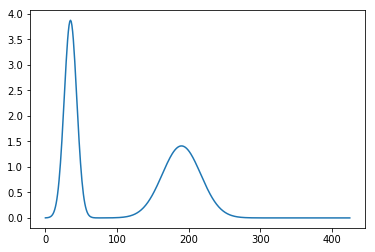

In [44]:
# And the third, kryptonite phase,
# followed by the third principal component
plt.plot(templates[:,2])

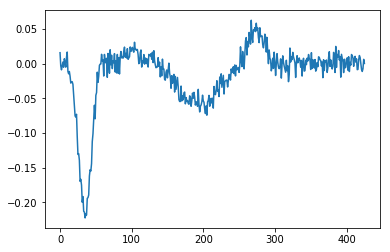

In [45]:
plt.plot(pca.components_[2])

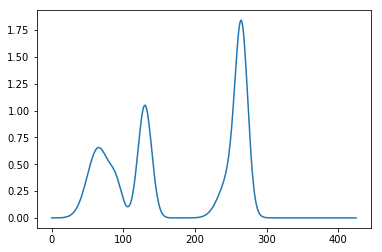

In [46]:
# And the unobtainium phase, followed by the fourth component
plt.plot(templates[:, 3])

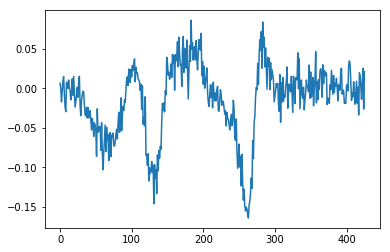

In [22]:
plt.plot(pca.components_[3])

This looks better than I expected, for unobtainium.  But there's a good chance that PCA regression will struggle to predict unobtainium well, especially when there isn't very much present.

We can plot explained variance like this:

Text(0,0.5,'cumulative explained variance')

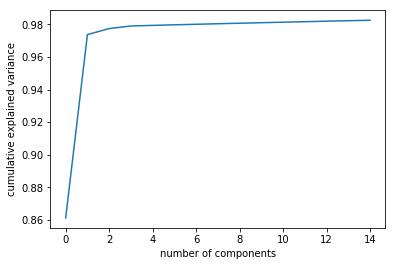

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We seem to hit a sweet spot at about 2 components, and then explained variance only gradually improves after this point.  This is a good result, given that we know that we know these samples only contain four minerals, and all other variance is from noise.

How do we look at the transformed data?  We use the transform method to find the "scores" associated with each observation.  These are new observations in the new feature space that PCA has found.  Each element in observations_in_pc_space has 15 elements in it, being the reduced feature space.  So we have a new feature space of 15 dimensions, when we used to have 426.

In [24]:
observations_in_pc_space = pca.transform(transposed_observations)

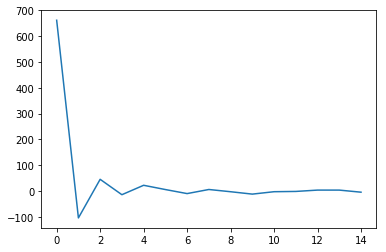

In [47]:
# Here's the first observation in the PC feature space.
plt.plot(observations_in_pc_space[0])

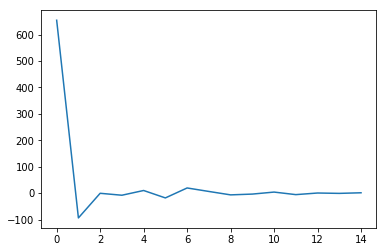

In [48]:
# Here's the third observation
plt.plot(observations_in_pc_space[2])

The point of all of this is to reduce the dimensionality so that we can better see the underlying structure.

We'd like to be able to plot the "scores" against each other, and look for patterns.

That's hard in 15 dimensions, but as we've seen, we can explain most of the variance in only a couple of dimensions.  Let's plot PC1 against PC2 for all observations.

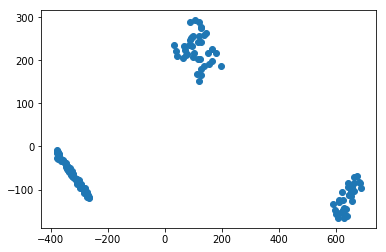

In [27]:
plt.plot(observations_in_pc_space[:, 0],
        observations_in_pc_space[:,1],
        'o')

Oh look!  There are clusters!

This tells us that there are three distinct groupings of our samples in the set of 150.  This is based only on the first couple of principal components.

What about PC2 and PC3?  Are there any clusters there?

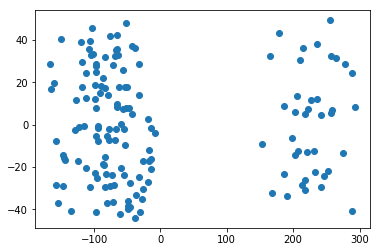

In [28]:
plt.plot(observations_in_pc_space[:, 1],
        observations_in_pc_space[:,2],
        'o')

Try to study the Octane dataset in the same manner!  You'll need to disregard the column with the octane ratings, as we're only interested in the spectra.